---
execute: 
    echo: false
    enabled: true
---

In [1]:
import json 
import glob
import torch
import pandas as pd
from IPython.display import display,Markdown

from shapesynthesis.plotting import plot_recon_2d, plot_recon_3d

In [2]:
def model_to_cate(model):
    name = model.split("_")[-1]
    return name.title()


def model_to_modelname(model):
    name_list = model.split("_")[:-1]
    name = " ".join(name_list)
    return name.title()

# Reconstruction of MNIST and ShapeNetCore

The encoder is the `encoder_sparse` and the rendered model is the point cloud
optimization rendering (a non-parametric method). The latter clearly outperforms 
all models.  

In [3]:

fn = glob.glob("./results/**/**.json")
results = []
for filename in fn:
    with open(filename,"r") as f:
        results.extend(json.load(f))

df = pd.DataFrame(results)
df = df.drop(["fscore","normalized"],axis=1)
df["MMD-CD"] *= 1e4 
df["MMD-EMD"] *= 1e3 

df["dataset"] = df["model"].apply(model_to_cate)
df["model"] = df["model"].apply(model_to_modelname)
df = df.groupby(by=["model","dataset"]).agg(["mean"])

df = df.unstack().swaplevel(1,2,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1)

display(df)


dataset             Airplane                   Car                 Chair  \
                      MMD-CD    MMD-EMD     MMD-CD    MMD-EMD     MMD-CD   
                        mean       mean       mean       mean       mean   
model                                                                      
Ect-128             3.382390   0.466779   6.221755   0.845426   5.716591   
Ect-256             0.316157   0.116938   0.889835   0.273740   0.683799   
Ect-64              6.810036   0.965796   9.268112   1.347526  21.936062   
Encoder             1.486651   6.064259   5.904585   4.444335   9.419030   
Encoder Chamfer     0.978317   9.759554   6.043088  13.437557   9.774287   
Encoder Downsample  2.365263  26.006261  11.392715  41.941542  16.051830   
Encoder Ect         2.413157   1.088348   7.749730   2.471831  13.056453   

dataset                             Mnist              
                      MMD-EMD      MMD-CD     MMD-EMD  
                         mean        mean        mean  
model                                                  
Ect-128              0.821442         NaN         NaN  
Ect-256              0.221733         NaN         NaN  
Ect-64               2.929956         NaN         NaN  
Encoder              7.773450   41.341307   11.577831  
Encoder Chamfer     24.118090         NaN         NaN  
Encoder Downsample  75.206883  159.988590  221.338034  
Encoder Ect          4.289896         NaN         NaN

# Model outputs

In [4]:
def visualize_2d_model(model,num_pc=5):
    recon_pcs = torch.load(f'./results/{model}/reconstructions.pt').cpu().detach().squeeze().numpy()
    reference_pcs = torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_2d(recon_pcs=recon_pcs,ref_pcs=reference_pcs,num_pc=num_pc)

def visualize_3d_model(model,scale=1.0):
    recon_pcs = scale*torch.load(f'./results/{model}/reconstructions.pt').cpu().detach().squeeze().numpy()
    reference_pcs = scale*torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_3d(recon_pcs=recon_pcs,ref_pcs=reference_pcs)

def visualize_2d_rendered(folder,ectsize,num_pc=5):
    recon_pcs = torch.load(f'./results/{folder}/reconstructions_{ectsize}.pt').cpu().detach().squeeze().numpy()
    reference_pcs = torch.load(f'./results/{folder}/references_{ectsize}.pt').cpu().detach().squeeze().numpy()
    plot_recon_2d(recon_pcs=recon_pcs,ref_pcs=reference_pcs,num_pc=num_pc)

## MNIST

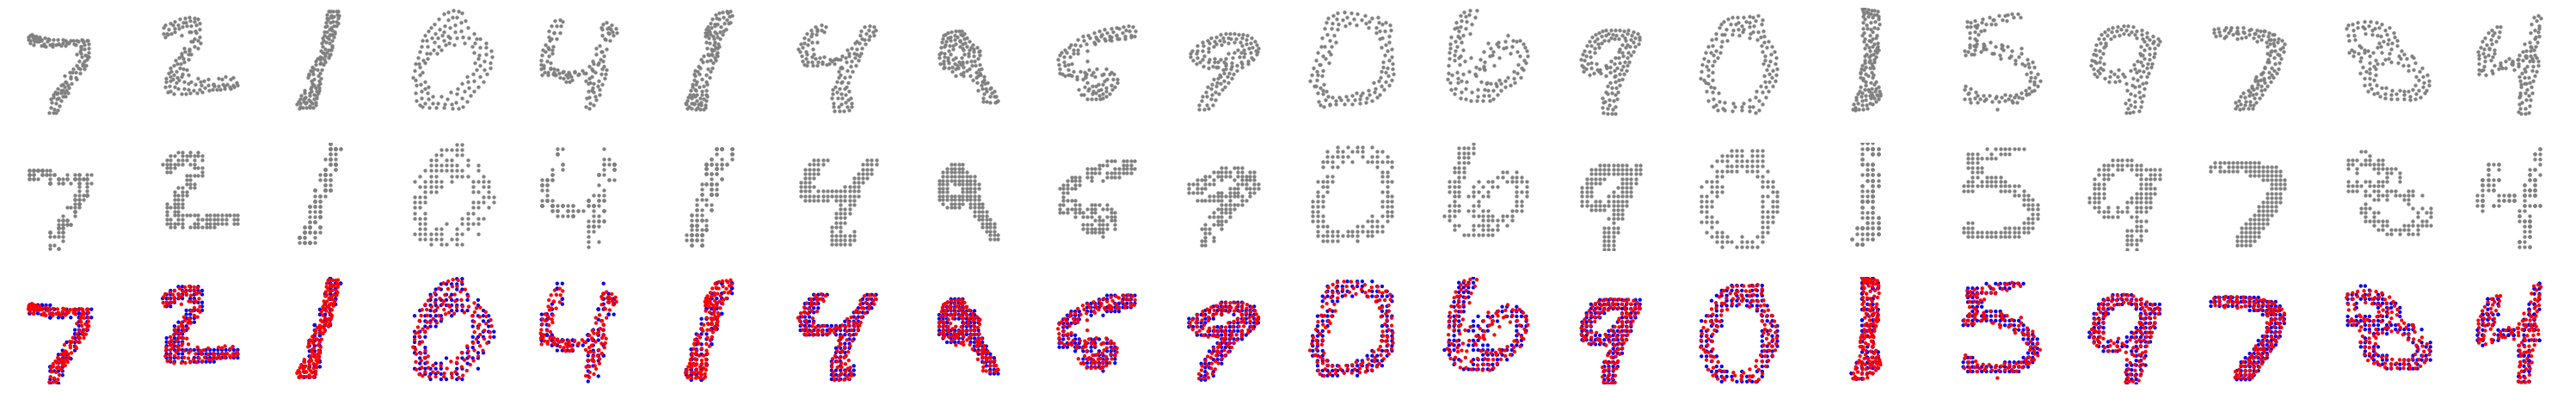

In [5]:
visualize_2d_model("encoder_mnist",num_pc=20)

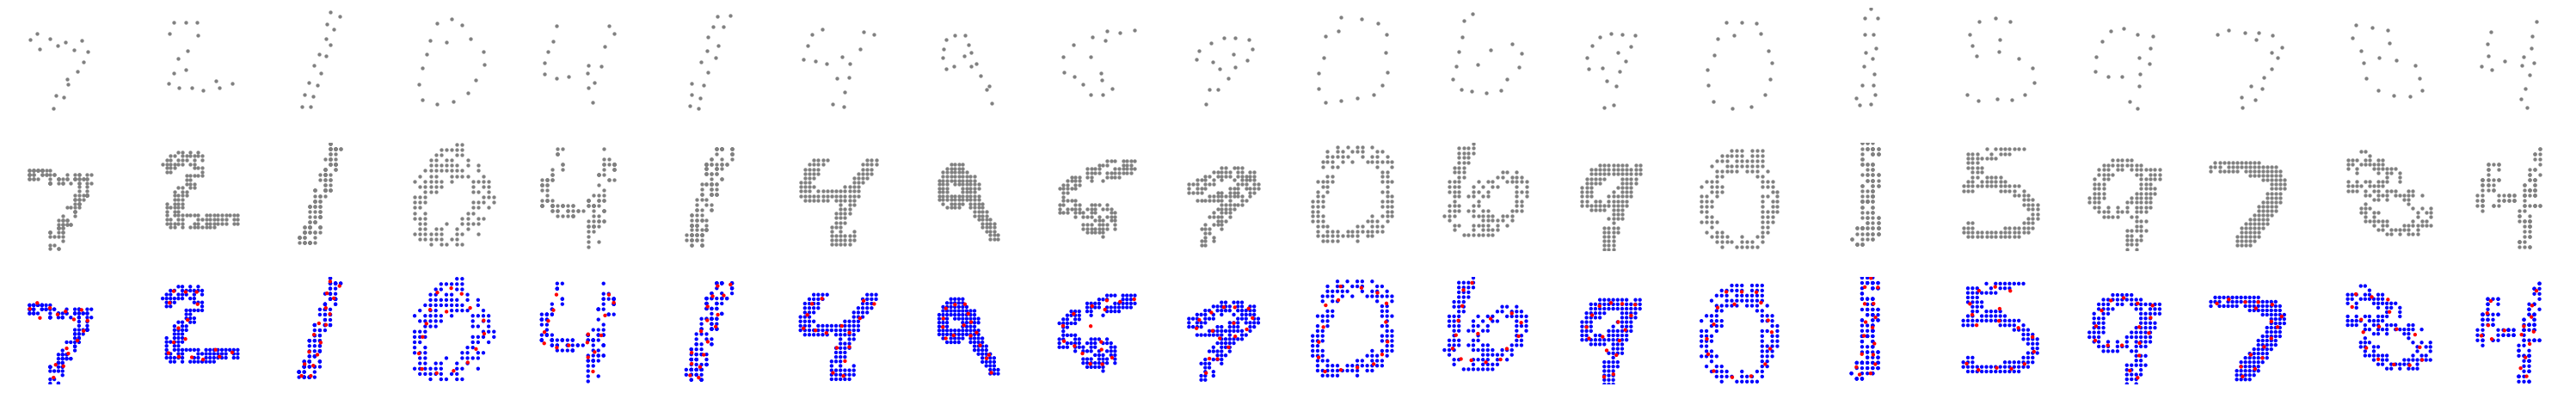

In [6]:
visualize_2d_model("encoder_downsample_mnist",num_pc=20)

In [7]:
# visualize_2d_model("encoder_mnist_upsample",num_pc=10)

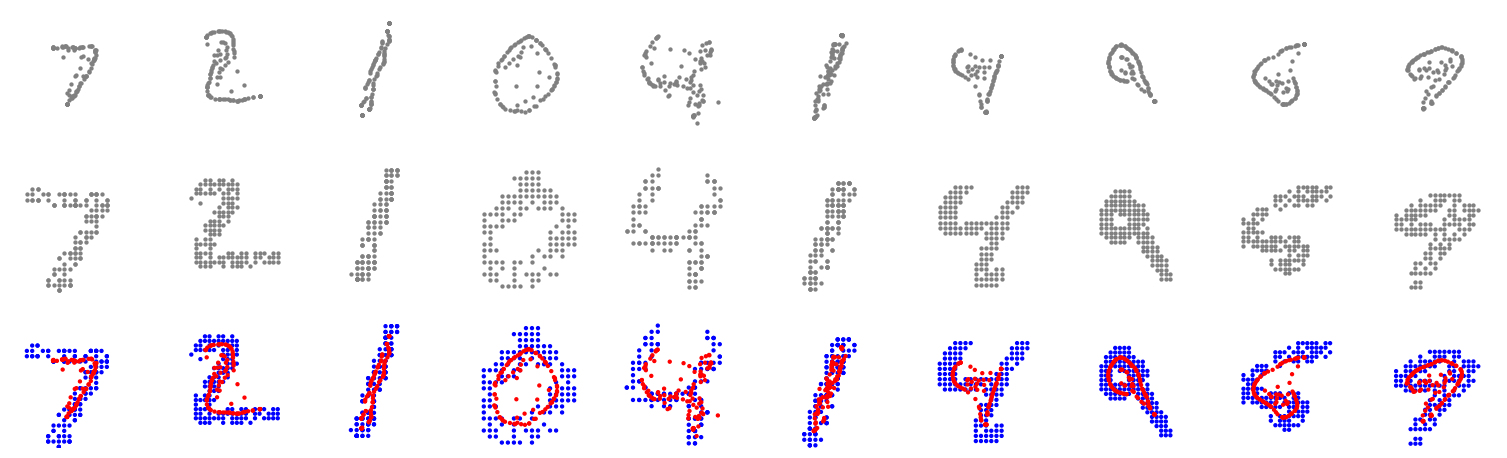

In [8]:
visualize_2d_rendered("rendered_mnist",128,10)

## CNN Encoder Chair 

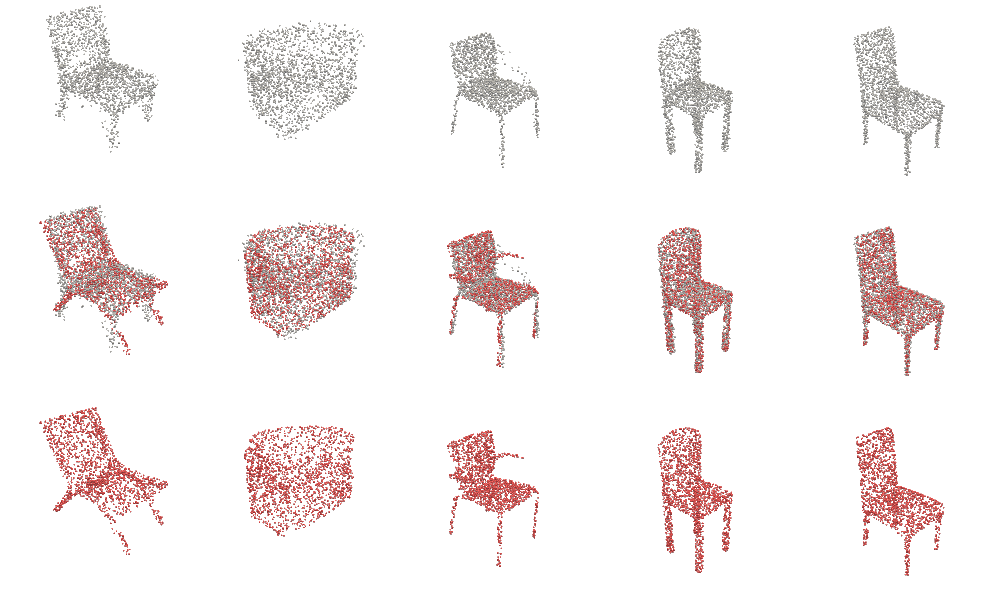

In [9]:
visualize_3d_model("encoder_chair",scale=6)


## CNN Encoder Chair

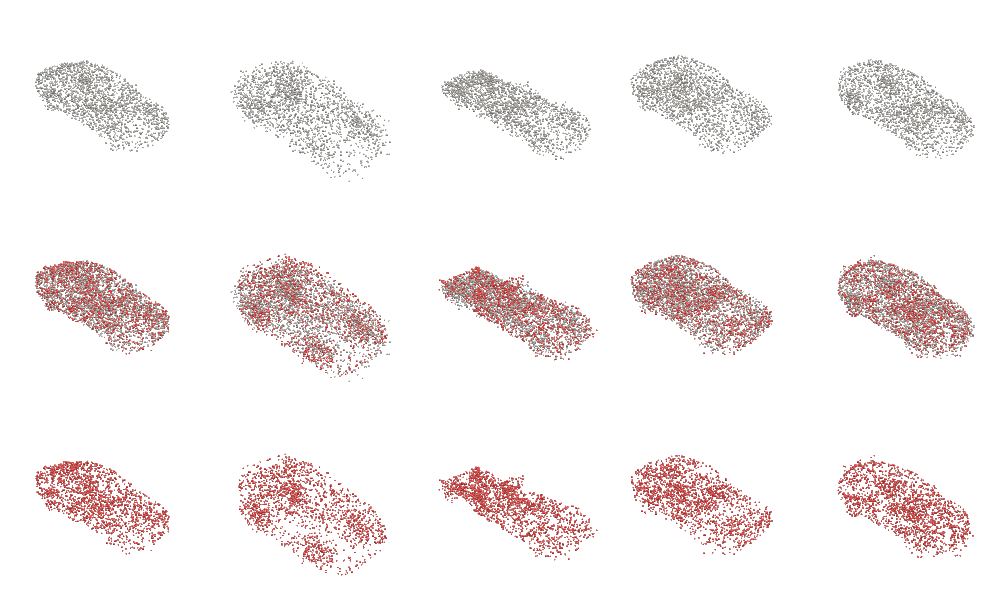

In [10]:
visualize_3d_model("encoder_car",scale=7)


# Encoder with ECT loss

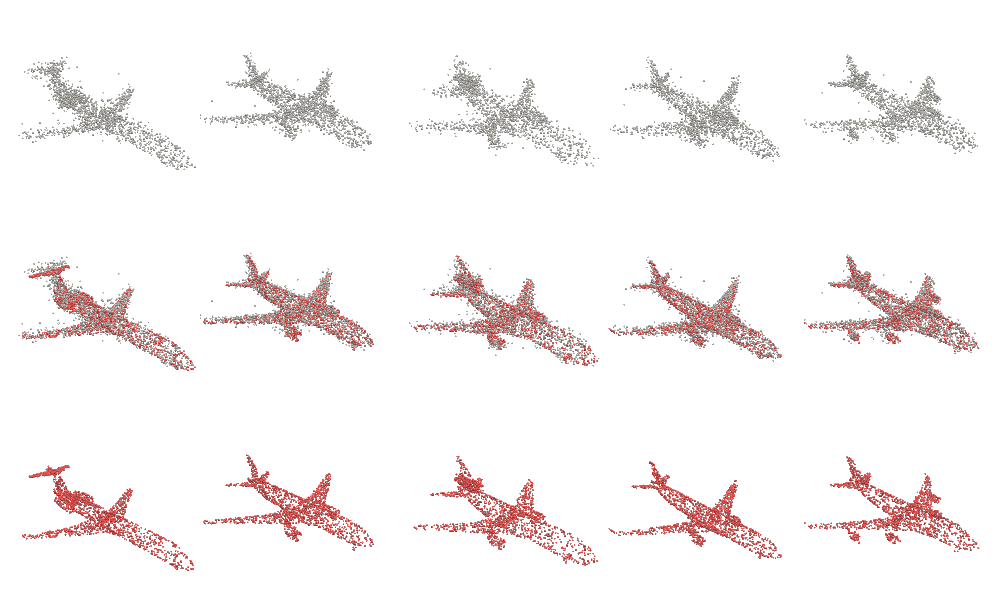

In [11]:
visualize_3d_model("encoder_ect_airplane",scale=10)

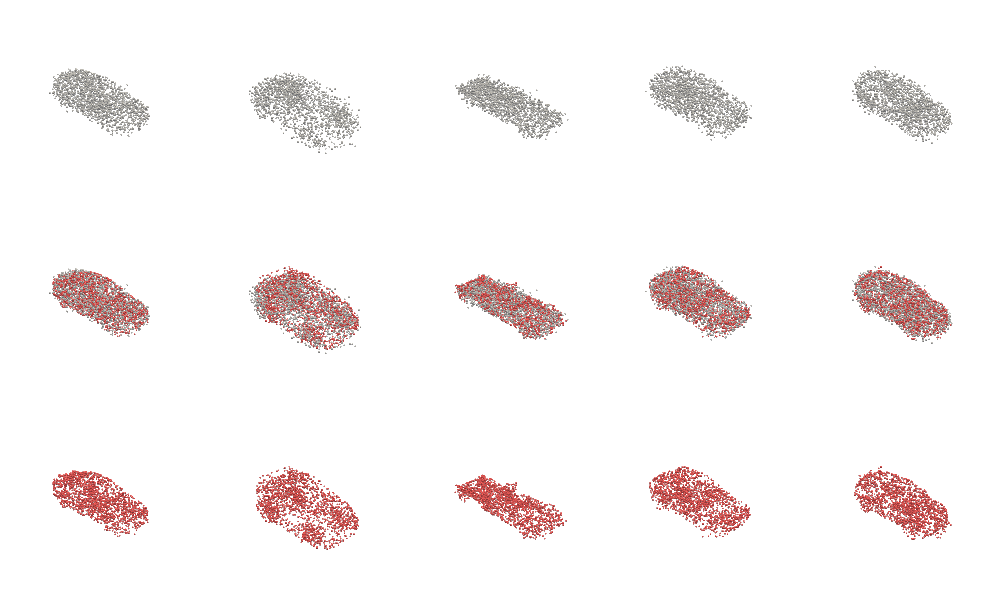

In [12]:
visualize_3d_model("encoder_ect_car",scale=5)

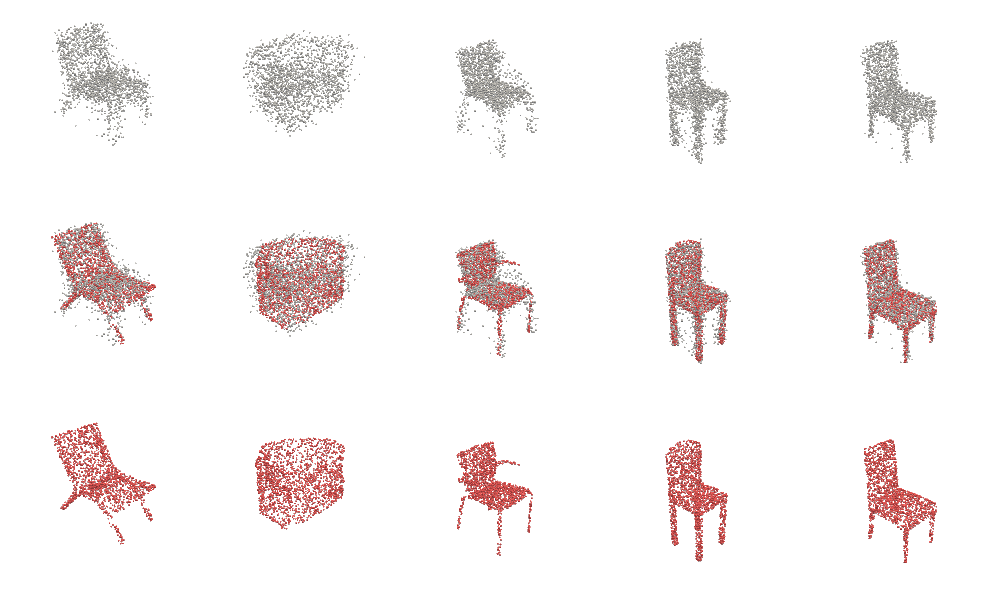

In [13]:
visualize_3d_model("encoder_ect_chair",scale=5)

## CNN Encoder Airplane

In [14]:
# visualize_3d_model("encoder_airplane",scale=10)


## ECT-64

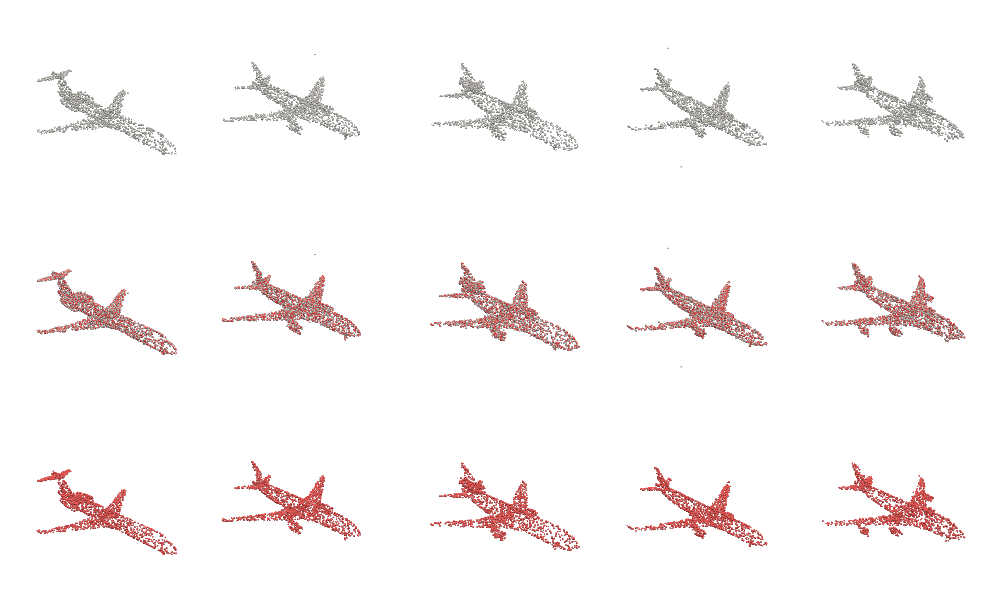

In [15]:
def plot_rendered(cate,resolution,scale=1):
    recon_pcs = scale*torch.load(f'./results/rendered/reconstructions_{cate}_{resolution}.pt').cpu().detach().squeeze().numpy()
    reference_pcs = scale*torch.load(f'./results/rendered/references_{cate}_{resolution}.pt').cpu().detach().squeeze().numpy()
    plot_recon_3d(recon_pcs=recon_pcs,ref_pcs=reference_pcs)

plot_rendered("airplane","128")

# Downsample Airplane

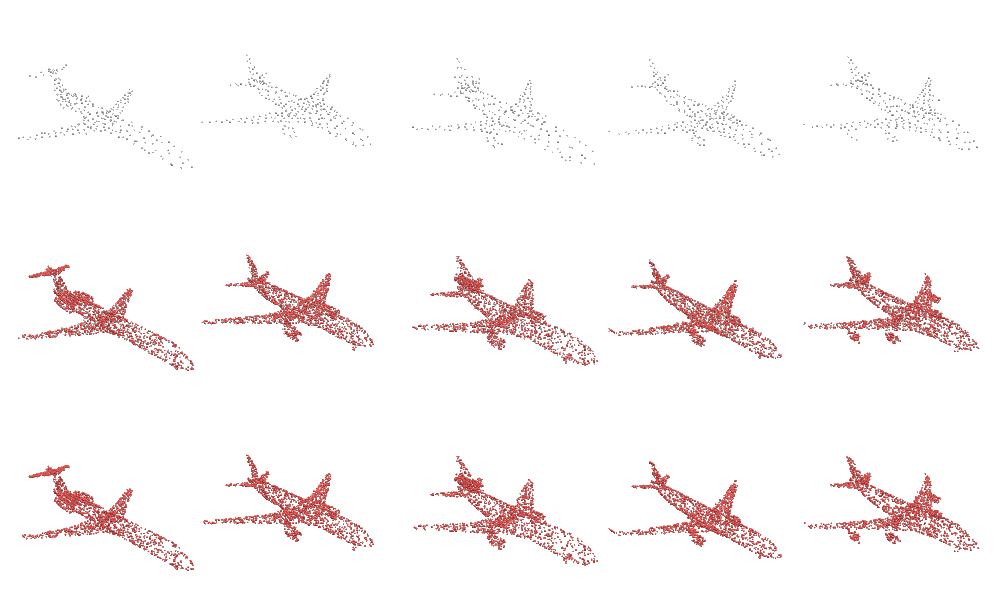

In [16]:
visualize_3d_model("encoder_downsample_airplane",scale=10)

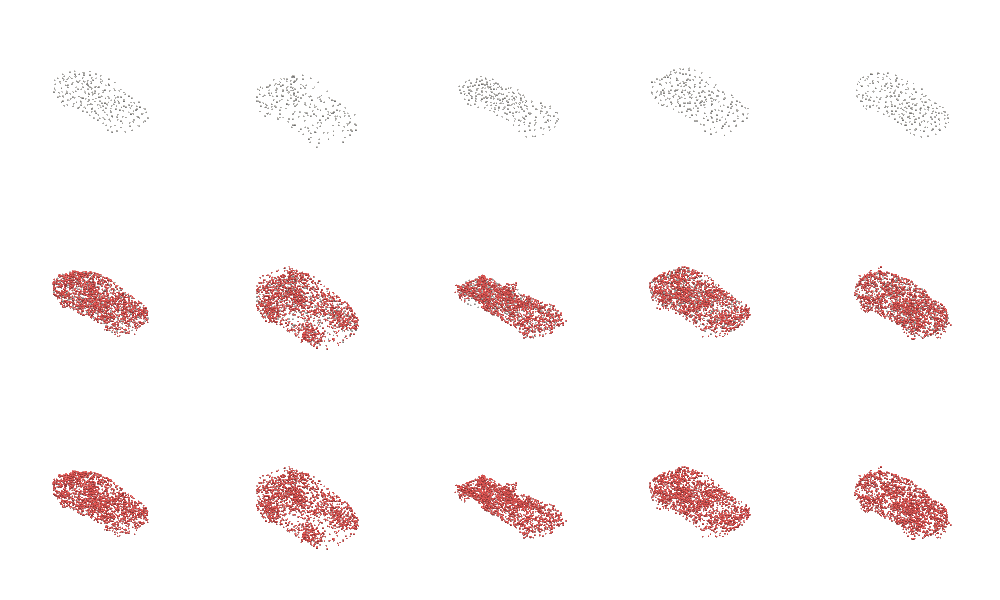

In [17]:
visualize_3d_model("encoder_downsample_car",scale=5)

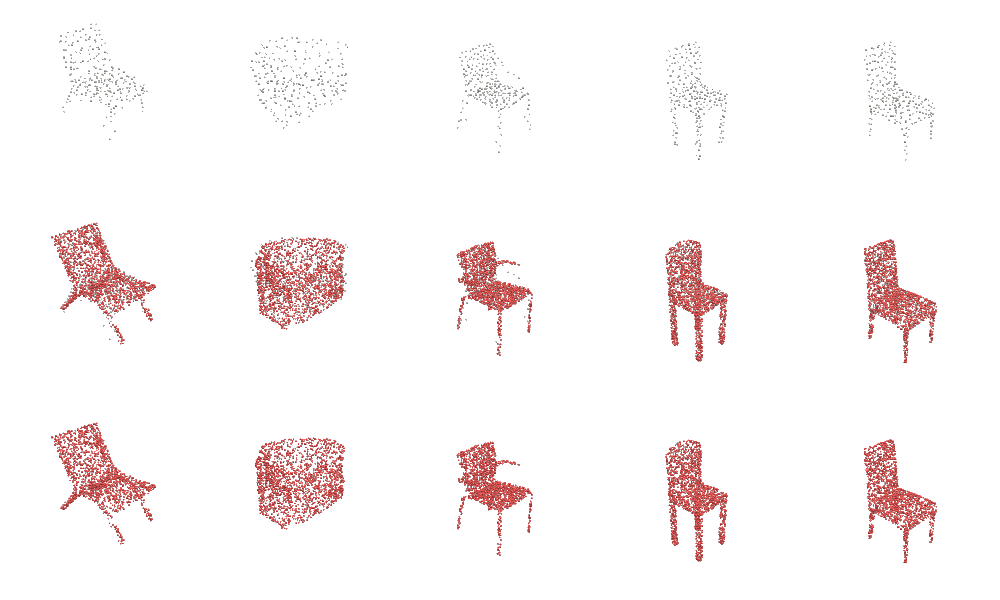

In [18]:
visualize_3d_model("encoder_downsample_chair",scale=5)